In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('1', '0', '0', '0', '1', '0', '1', '1')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ A □ ■ ■
■ □ ■ □ □ ■ □ □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_maze_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=100)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 2000
exploit = 500

df_other = XNCSExp(
    maze=maze,
    cfg=XNCScfg,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0,
             exploit_trials=exploit + explore,
             pre_generate=True
           )



Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 6.438388000000003, 'numerosity': 7000, 'population': 5892, 'average_specificity': 8.564285714285715, 'fraction_accuracy': 1.0, 'knowledge': 10.95890410958904}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1257.3161234796364, 'perf_time': 0.44417859999998655, 'numerosity': 7000, 'population': 5450, 'average_specificity': 7.980571428571428, 'fraction_accuracy': 1.0, 'knowledge': 7.534246575342466}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 11, 'reward': 1023.8709659482762, 'perf_time': 0.3590006999999673, 'numerosity': 7000, 'population': 5286, 'average_specificity': 8.095285714285714, 'fraction_accuracy': 1.0, 'knowledge': 6.8493150684931505}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 9, 'reward': 1048.8876099436375, 'perf_time': 0.3336328999999978, 'numerosity': 7000, 'population': 5268, 'average_specificity': 8.511, 'fraction_accuracy': 1.0, 'knowledge': 

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 4.241750100000218, 'population': 5853, 'numerosity': 7000, 'average_specificity': 8.011142857142858, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 6, 'reward': 1132.4085326035574, 'perf_time': 0.30875250000008236, 'population': 5287, 'numerosity': 7000, 'average_specificity': 7.460714285714285, 'knowledge': 99.31506849315068}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 4, 'reward': 1301.2749009792358, 'perf_time': 0.39512779999995473, 'population': 5057, 'numerosity': 7000, 'average_specificity': 7.381714285714286, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 700, 'steps_in_trial': 5, 'reward': 1180.4229351022, 'perf_time': 0.2696293000001333, 'population': 4927, 'numerosity': 7000, 'average_specificity': 7.288857142857143, 'knowledge': 100.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 6, 'reward': 1135.064094309687, 'perf_time': 0.1812448999

In [5]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']
df['knowledge_other']=df_other['knowledge']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,knowledge,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other,knowledge_other
trial,,,,,,,,,,,,,
0,100,0.000000e+00,4.241750,5853,7000,8.011143,100.000000,100,5892,7000,8.564286,1.00,10.958904
100,5,1.286283e+03,0.178884,5521,7000,7.266571,100.000000,2,5548,7000,7.969000,1.00,7.534247
200,6,1.132409e+03,0.308753,5287,7000,7.460714,99.315068,6,5450,7000,7.980571,1.00,7.534247
300,7,1.091801e+03,0.221936,5220,7000,7.202857,100.000000,19,5341,7000,7.974000,1.00,6.849315
400,3,1.427822e+03,0.371512,5107,7000,7.427857,100.000000,18,5317,7000,8.079571,1.00,6.849315
500,4,1.301275e+03,0.395128,5057,7000,7.381714,100.000000,11,5286,7000,8.095286,1.00,6.849315
600,6,1.128100e+03,0.532877,5016,7000,7.463000,100.000000,6,5264,7000,8.080286,1.00,6.849315
700,5,1.180423e+03,0.269629,4927,7000,7.288857,100.000000,9,5268,7000,8.511000,1.00,6.849315
800,100,1.336087e-12,2.555656,4835,7000,7.322857,99.315068,5,5268,7000,8.618000,1.00,6.849315


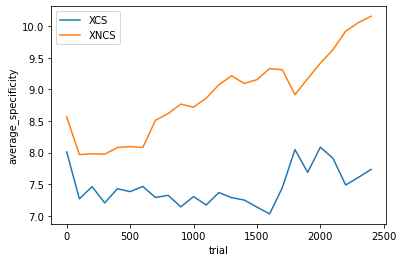

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])

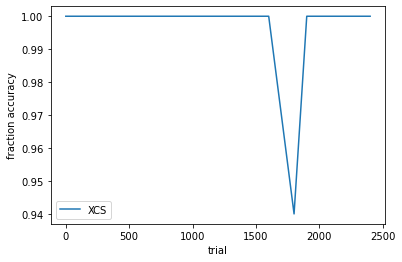

In [7]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

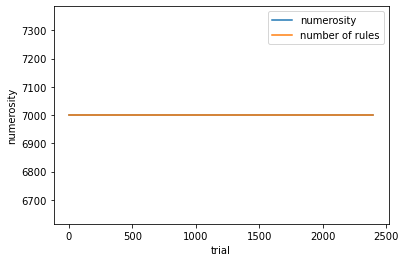

In [8]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

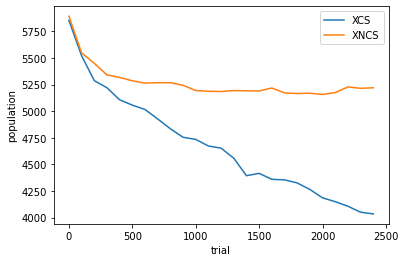

In [9]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

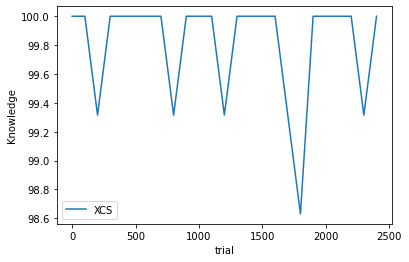

In [10]:
ax = df['knowledge'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XCS"])

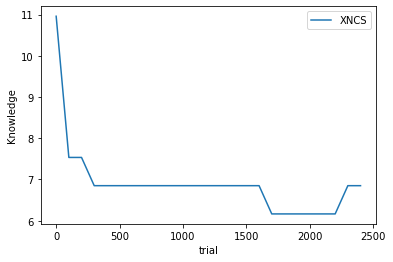

In [11]:
ax = df['knowledge_other'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("Knowledge")
ax.legend(["XNCS"])

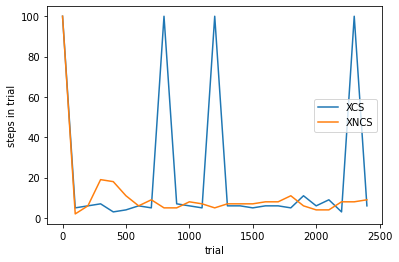

In [12]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])

In [13]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_other"])/number_of_experiments)

523.0
288.0
